# 3D Reference geometry

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 120

from cut_predictor import MeshPredictor

In [5]:
reg = MeshPredictor.from_h5('../../models/reference_3d.h5')

In [11]:
geometry_30 = pd.read_csv('../../data/geometry_zt30.csv')[['x', 'y', 'z']].to_numpy()
geometry_50 = pd.read_csv('../../data/geometry_zt50.csv')[['x', 'y', 'z']].to_numpy()
geometry_70 = pd.read_csv('../../data/geometry_zt70.csv')[['x', 'y', 'z']].to_numpy()

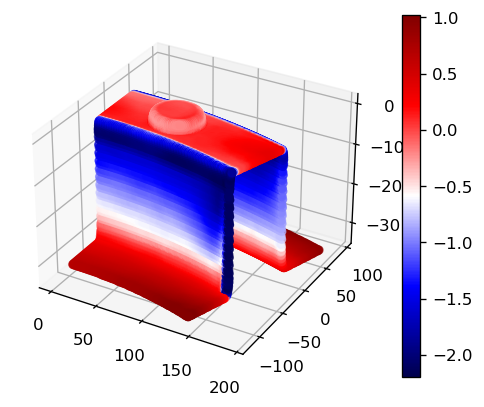

In [12]:
x, y = reg.predict({
        'Blechdicke': 1.01, 
        'Niederhalterkraft': 400.0, 
        'Ziehspalt': 2.4, 
        'Einlegeposition': -5, 
        'Ziehtiefe': 30,
        'Stempel_ID': 3,
        'E': 191.37245,
        'Rp0': 138.22696,
        'Rp50': 449.528189,
    }, 
    positions=geometry_30)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(geometry_30[:, 0], geometry_30[:, -2], geometry_30[:, -1], 
    c=y[:, 0], 
    cmap='seismic') 
fig.colorbar(p, ax=ax)